# CRYPTOCURRENCY CLOSING PRICE PREDICTION

### APPROACH
Several steps will be taken to achieve this objective and they include
* Data preparation and preprocessing
* Data cleaning and transformation
* Exploratory Data analysis 
* Feature selection
* Model building and evaluation
* Cross validation
* Making predictions

### DATA PREPARATION AND INSPECTION

In [1]:
#Importing necessary libraries
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest

In [2]:
#loading the data sets
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
#previewing the train dataset
train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [4]:
#Previewing test dataset
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,...,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,...,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


In [5]:
#checking the shapes of the datasets
train.shape, test.shape

((12632, 49), (6222, 48))

In [6]:
#inspecting the train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             12391 non-null  float64
 10  reddit_posts_score       12391 non-null  float64
 11  reddit_comments          12402 non-null  float64
 12  reddit_comments_score    12402 non-null  float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam            

After inspecting the train set, all the data types are correct

In [7]:
#inspecting the test set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6222 non-null   object 
 1   asset_id                 6222 non-null   int64  
 2   open                     4304 non-null   float64
 3   high                     4304 non-null   float64
 4   low                      4304 non-null   float64
 5   volume                   4302 non-null   float64
 6   market_cap               4191 non-null   float64
 7   url_shares               4285 non-null   float64
 8   unique_url_shares        4285 non-null   float64
 9   reddit_posts             6122 non-null   float64
 10  reddit_posts_score       6122 non-null   float64
 11  reddit_comments          6109 non-null   float64
 12  reddit_comments_score    6109 non-null   float64
 13  tweets                   4289 non-null   float64
 14  tweet_spam              

After inspecting the test set, all the data types are correct

### Checking unique values

In [8]:
train.volume_24h_rank.unique()

array([ 2., nan,  3.,  1.,  4.,  9., 10.,  5.])

In [9]:
train.social_volume_24h_rank.unique()

array([ 1., nan,  2.])

In [10]:
train.social_score_24h_rank.unique()

array([ 1., nan,  2.])

In [11]:
train.medium.unique()

array([ 2., nan, 10.,  1.,  3.,  8.,  4.,  5.,  9.,  7., 12.,  6.])

In [12]:
train.youtube.unique()    

array([  5.,  nan,   2.,   3.,   4.,   1.,   8.,   6.,   9.,  62.,  13.,
        10.,  15.,  16.,   7.,  12.,  27.,  19.,  21.,  33.,  11.,  32.,
        14.,  18.,  42.,  22.,  17.,  20.,  23.,  37.,  35.,  26.,  39.,
        30.,  25.,  63.,  28.,  29.,  31.,  36.,  79.,  38.,  48., 132.,
        24.,  71.,  34., 178.,  49.,  57.,  40.])

In [13]:
#saving the column 'id' for later use
train_id = train['id']
test_id = test['id']

In [14]:
#Dropping unimportant columns in the test and train set
train = train.drop(['id', 'asset_id'], axis = 1)
test = test.drop(['id', 'asset_id'], axis = 1)

In [15]:
train.shape, test.shape

((12632, 47), (6222, 46))

Confirming that the "id" and "asset_id" coloumns have been removed

### DATA CLEANING ###

### Checking for missing values

In [16]:
#Checking missing values in train data
train.isna().sum()

open                       4015
high                       4015
low                        4015
volume                     4027
market_cap                 4253
url_shares                 4057
unique_url_shares          4057
reddit_posts                241
reddit_posts_score          241
reddit_comments             230
reddit_comments_score       230
tweets                     4048
tweet_spam                 4048
tweet_followers            4058
tweet_quotes               4058
tweet_retweets             4058
tweet_replies              4058
tweet_favorites            4058
tweet_sentiment1           4048
tweet_sentiment2           4048
tweet_sentiment3           4048
tweet_sentiment4           4048
tweet_sentiment5           4048
tweet_sentiment_impact1    4048
tweet_sentiment_impact2    4048
tweet_sentiment_impact3    4048
tweet_sentiment_impact4    4048
tweet_sentiment_impact5    4048
social_score               4048
average_sentiment          4048
news                       4076
price_sc

In [17]:
#Checking missing values in test data
test.isna().sum()

open                       1918
high                       1918
low                        1918
volume                     1920
market_cap                 2031
url_shares                 1937
unique_url_shares          1937
reddit_posts                100
reddit_posts_score          100
reddit_comments             113
reddit_comments_score       113
tweets                     1933
tweet_spam                 1933
tweet_followers            1935
tweet_quotes               1935
tweet_retweets             1935
tweet_replies              1935
tweet_favorites            1935
tweet_sentiment1           1933
tweet_sentiment2           1933
tweet_sentiment3           1933
tweet_sentiment4           1933
tweet_sentiment5           1933
tweet_sentiment_impact1    1933
tweet_sentiment_impact2    1933
tweet_sentiment_impact3    1933
tweet_sentiment_impact4    1933
tweet_sentiment_impact5    1933
social_score               1933
average_sentiment          1933
news                       1935
price_sc

In [18]:
#checking the descriptive statistics of the train set before filling NAs
train.describe().T

,count,mean,std,min,25%,50%,75%,max
open,8617.0,1.550482e+04,1.410571e+04,4.545088e+03,8.405552e+03,9.671832e+03,1.307720e+04,6.140893e+04
high,8617.0,1.555948e+04,1.419111e+04,4.589712e+03,8.437392e+03,9.689752e+03,1.308984e+04,6.150737e+04
low,8617.0,1.544959e+04,1.402265e+04,4.267292e+03,8.378513e+03,9.648410e+03,1.304711e+04,6.107319e+04
volume,8605.0,1.300724e+09,1.711922e+09,2.373622e+08,6.196589e+08,9.820621e+08,1.611974e+09,5.185678e+10
market_cap,8379.0,2.826010e+11,2.663052e+11,8.393765e+10,1.506098e+11,1.755833e+11,2.191438e+11,1.140905e+12
url_shares,8575.0,1.247310e+03,5.931083e+02,2.000000e+00,8.570000e+02,1.124000e+03,1.507500e+03,1.010700e+04
unique_url_shares,8575.0,7.578629e+02,3.036274e+02,2.000000e+00,5.590000e+02,7.030000e+02,8.930000e+02,4.880000e+03
reddit_posts,12391.0,3.652772e+01,3.161028e+01,1.000000e+00,1.300000e+01,2.800000e+01,5.000000e+01,5.000000e+02
reddit_posts_score,12391.0,3.239898e+02,6.774196e+02,0.000000e+00,7.900000e+01,1.560000e+02,3.280000e+02,3.055900e+04
reddit_comments,12402.0,1.013974e+02,8.947452e+01,1.000000e+00,4.100000e+01,6.500000e+01,1.420000e+02,1.333000e+03


In [19]:
#checking the descriptive statistics of the test set before filling NAs
test.describe().T

,count,mean,std,min,25%,50%,75%,max
open,4304.0,1.505430e+04,1.383243e+04,4.910805e+03,8.328747e+03,9.592641e+03,1.188010e+04,6.115888e+04
high,4304.0,1.510381e+04,1.391160e+04,4.981828e+03,8.346181e+03,9.602396e+03,1.189009e+04,6.156879e+04
low,4304.0,1.499971e+04,1.374439e+04,4.794965e+03,8.308561e+03,9.569266e+03,1.186813e+04,6.073252e+04
volume,4302.0,1.290371e+09,1.928771e+09,2.848978e+08,6.161449e+08,9.376669e+08,1.525557e+09,5.830593e+10
market_cap,4191.0,2.743587e+11,2.612154e+11,8.862308e+10,1.489114e+11,1.746268e+11,2.168739e+11,1.576560e+12
url_shares,4285.0,1.238792e+03,6.044378e+02,1.000000e+00,8.450000e+02,1.123000e+03,1.488000e+03,8.852000e+03
unique_url_shares,4285.0,7.530677e+02,3.160870e+02,1.000000e+00,5.530000e+02,6.990000e+02,8.740000e+02,5.071000e+03
reddit_posts,6122.0,3.572852e+01,3.030093e+01,1.000000e+00,1.300000e+01,2.800000e+01,4.900000e+01,2.150000e+02
reddit_posts_score,6122.0,3.278718e+02,8.670064e+02,0.000000e+00,7.800000e+01,1.530000e+02,3.220000e+02,4.376000e+04
reddit_comments,6109.0,1.001897e+02,9.045690e+01,1.000000e+00,4.100000e+01,6.300000e+01,1.390000e+02,1.092000e+03


### Filling missing values

In [20]:
#Fill missing values in the entire train data set
imputer = KNNImputer(n_neighbors=3, weights='uniform')
imputed_values = imputer.fit_transform(train)
train = pd.DataFrame(imputed_values, columns=train.columns)

In [21]:
#Confirming missing values have been filled
train.isna().sum()

open                       0
high                       0
low                        0
volume                     0
market_cap                 0
url_shares                 0
unique_url_shares          0
reddit_posts               0
reddit_posts_score         0
reddit_comments            0
reddit_comments_score      0
tweets                     0
tweet_spam                 0
tweet_followers            0
tweet_quotes               0
tweet_retweets             0
tweet_replies              0
tweet_favorites            0
tweet_sentiment1           0
tweet_sentiment2           0
tweet_sentiment3           0
tweet_sentiment4           0
tweet_sentiment5           0
tweet_sentiment_impact1    0
tweet_sentiment_impact2    0
tweet_sentiment_impact3    0
tweet_sentiment_impact4    0
tweet_sentiment_impact5    0
social_score               0
average_sentiment          0
news                       0
price_score                0
social_impact_score        0
correlation_rank           0
galaxy_score  

In [22]:
# Fill missing values in the test data set
imputer = KNNImputer(n_neighbors=3, weights='uniform')
imputed_values = imputer.fit_transform(test)
test = pd.DataFrame(imputed_values, columns=test.columns)

In [23]:
#Confirming missing values have been filled
test.isna().sum()

open                       0
high                       0
low                        0
volume                     0
market_cap                 0
url_shares                 0
unique_url_shares          0
reddit_posts               0
reddit_posts_score         0
reddit_comments            0
reddit_comments_score      0
tweets                     0
tweet_spam                 0
tweet_followers            0
tweet_quotes               0
tweet_retweets             0
tweet_replies              0
tweet_favorites            0
tweet_sentiment1           0
tweet_sentiment2           0
tweet_sentiment3           0
tweet_sentiment4           0
tweet_sentiment5           0
tweet_sentiment_impact1    0
tweet_sentiment_impact2    0
tweet_sentiment_impact3    0
tweet_sentiment_impact4    0
tweet_sentiment_impact5    0
social_score               0
average_sentiment          0
news                       0
price_score                0
social_impact_score        0
correlation_rank           0
galaxy_score  

In [24]:
#checking the descriptive statistics after transformation
train.describe().T

,count,mean,std,min,25%,50%,75%,max
open,12632.0,1.781057e+04,1.218251e+04,4.545088e+03,9.166192e+03,1.187166e+04,2.257438e+04,6.140893e+04
high,12632.0,1.786910e+04,1.225175e+04,4.589712e+03,9.176127e+03,1.187988e+04,2.264080e+04,6.150737e+04
low,12632.0,1.774021e+04,1.210974e+04,4.267292e+03,9.150605e+03,1.185158e+04,2.247347e+04,6.107319e+04
volume,12632.0,1.372999e+09,1.418075e+09,2.373622e+08,7.634474e+08,1.522753e+09,1.522753e+09,5.185678e+10
market_cap,12632.0,3.281760e+11,2.298805e+11,8.393765e+10,1.673963e+11,2.177288e+11,4.171700e+11,1.140905e+12
url_shares,12632.0,1.206933e+03,4.954178e+02,2.000000e+00,9.817500e+02,1.126000e+03,1.315250e+03,1.010700e+04
unique_url_shares,12632.0,7.444227e+02,2.531480e+02,2.000000e+00,6.277500e+02,7.190000e+02,7.940000e+02,4.880000e+03
reddit_posts,12632.0,3.653399e+01,3.131866e+01,1.000000e+00,1.300000e+01,2.850000e+01,5.000000e+01,5.000000e+02
reddit_posts_score,12632.0,3.397515e+02,7.824767e+02,0.000000e+00,8.000000e+01,1.590000e+02,3.460000e+02,3.055900e+04
reddit_comments,12632.0,1.018290e+02,8.889325e+01,1.000000e+00,4.100000e+01,6.600000e+01,1.410000e+02,1.333000e+03


In [25]:
#checking the descriptive statistics after transformation
test.describe().T

,count,mean,std,min,25%,50%,75%,max
open,6222.0,1.330636e+04,1.192049e+04,4.910805e+03,9.092954e+03,9.149968e+03,1.077576e+04,6.115888e+04
high,6222.0,1.334464e+04,1.198834e+04,4.981828e+03,9.111665e+03,9.162428e+03,1.078865e+04,6.156879e+04
low,6222.0,1.326118e+04,1.184204e+04,4.794965e+03,9.077602e+03,9.130761e+03,1.074560e+04,6.073252e+04
volume,6222.0,1.031010e+09,1.656723e+09,2.848978e+08,4.292252e+08,6.487373e+08,1.236688e+09,5.830593e+10
market_cap,6222.0,2.441929e+11,2.261687e+11,8.862308e+10,1.650602e+11,1.650602e+11,1.981652e+11,1.576560e+12
url_shares,6222.0,1.113605e+03,5.364581e+02,1.000000e+00,8.363333e+02,8.770000e+02,1.295000e+03,8.852000e+03
unique_url_shares,6222.0,6.894777e+02,2.797685e+02,1.000000e+00,5.486667e+02,5.690000e+02,7.860000e+02,5.071000e+03
reddit_posts,6222.0,3.558770e+01,3.007908e+01,1.000000e+00,1.300000e+01,2.766667e+01,4.900000e+01,2.150000e+02
reddit_posts_score,6222.0,3.302546e+02,8.602942e+02,0.000000e+00,7.900000e+01,1.560000e+02,3.337500e+02,4.376000e+04
reddit_comments,6222.0,9.976722e+01,8.968560e+01,1.000000e+00,4.100000e+01,6.500000e+01,1.360000e+02,1.092000e+03


All missing values have been filled. Both test and train sets are clean.

### EXPLORATORY DATA ANALYSIS

#### Visualization

Text(0, 0.5, 'close')

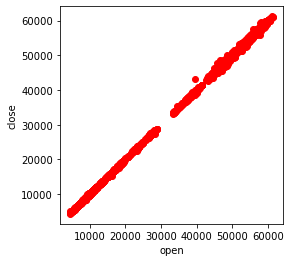

In [26]:
#plotting a scatterplot of open vs close
plt.figure(figsize=(4, 4))

plt.scatter(train['open'],train['close'], color='r')

plt.xlabel('open')
plt.ylabel('close')

From this scatterplot, it is observed that a linear relationship exists between open and close. This is because closing price increases as opening increases.

Text(0, 0.5, 'close')

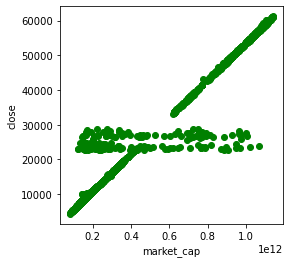

In [27]:
#plotting a scatterplot of market cap vs close
plt.figure(figsize=(4, 4))

plt.scatter(train['market_cap'], train['close'], color='g')

plt.xlabel('market_cap')
plt.ylabel('close')

From this plot, market cap rises as closing price rises. However, it is observed that there is a cluster of values when closing price is greater than 20000 but less than 30000. This means that as market cap rises from 0.2e12 to 0.6e12 , closing price does not exceed 30000.

Text(0, 0.5, 'close')

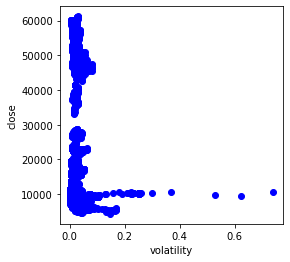

In [28]:
#plotting a scatterplot of volatility vs close
plt.figure(figsize=(4, 4))

plt.scatter( train['volatility'],train['close'], color='b')

plt.xlabel('volatility')
plt.ylabel('close')

From this plot, it is observed that volatility generally does not exceed 0.2 as closing price rises but there are unusual cases where volatility exceeds 0.6 when closing price is at 10000.

Text(0, 0.5, 'close')

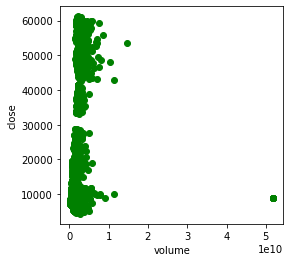

In [29]:
#plotting a scatterplot of volume vs close
plt.figure(figsize=(4, 4))

plt.scatter(train['volume'], train['close'], color='g')

plt.xlabel('volume')
plt.ylabel('close')

This plot shows that the volume of trading is between 0 and 1e10 as closing price inreases but majorly concentrated between 0 and 0.5e10 except for cases where volume of trading slightly exceed 1e10 and an extreme case where trading volume is at 5e10 when closing price is 10000.

#### Correlation

In [30]:
#specifying columns in X and Y
X = train.drop('close', axis = 1)
Y = train.close

In [31]:
#computing a correlation matrix
crypto_corr = train.corr()
crypto_corr

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
open,1.000000,0.999966,0.999963,0.345850,0.989672,0.509255,0.486697,0.392474,0.217646,0.565270,...,0.193947,0.772726,0.012048,-0.046660,0.097342,-0.084334,0.349345,0.151079,0.988488,0.999936
high,0.999966,1.000000,0.999937,0.346972,0.989719,0.510008,0.487340,0.393855,0.218288,0.565748,...,0.192902,0.772593,0.012338,-0.046657,0.097970,-0.084122,0.351023,0.151153,0.988457,0.999971
low,0.999963,0.999937,1.000000,0.344570,0.989624,0.508919,0.486345,0.391968,0.217252,0.564560,...,0.193904,0.772512,0.012216,-0.046625,0.097433,-0.084367,0.348940,0.152173,0.988512,0.999955
volume,0.345850,0.346972,0.344570,1.000000,0.345754,0.251025,0.213961,0.247208,0.132115,0.239017,...,0.045011,0.250886,-0.007085,-0.041222,0.087638,-0.016007,0.216057,0.078333,0.343960,0.346090
market_cap,0.989672,0.989719,0.989624,0.345754,1.000000,0.508923,0.485049,0.391067,0.217484,0.560358,...,0.195736,0.766623,0.013156,-0.046012,0.102437,-0.082106,0.349623,0.149149,0.999044,0.989681
url_shares,0.509255,0.510008,0.508919,0.251025,0.508923,1.000000,0.884280,0.650050,0.205096,0.294323,...,-0.010904,0.268302,0.037108,-0.049058,0.147366,0.024276,0.613858,0.127762,0.508390,0.510275
unique_url_shares,0.486697,0.487340,0.486345,0.213961,0.485049,0.884280,1.000000,0.578577,0.159654,0.295237,...,-0.009855,0.275715,0.013908,-0.054743,0.126863,0.012415,0.531133,0.127186,0.481721,0.487548
reddit_posts,0.392474,0.393855,0.391968,0.247208,0.391067,0.650050,0.578577,1.000000,0.198007,0.192140,...,-0.138682,0.057080,0.055869,-0.022027,0.237071,0.078886,0.742407,0.028133,0.385384,0.394773
reddit_posts_score,0.217646,0.218288,0.217252,0.132115,0.217484,0.205096,0.159654,0.198007,1.000000,0.273069,...,-0.016282,0.120087,0.033849,-0.010067,0.028668,0.006288,0.206924,0.019314,0.217744,0.217933
reddit_comments,0.565270,0.565748,0.564560,0.239017,0.560358,0.294323,0.295237,0.192140,0.273069,1.000000,...,0.116445,0.533337,-0.021219,-0.040978,0.013312,-0.076895,0.142973,0.124571,0.554764,0.564689


<AxesSubplot:>

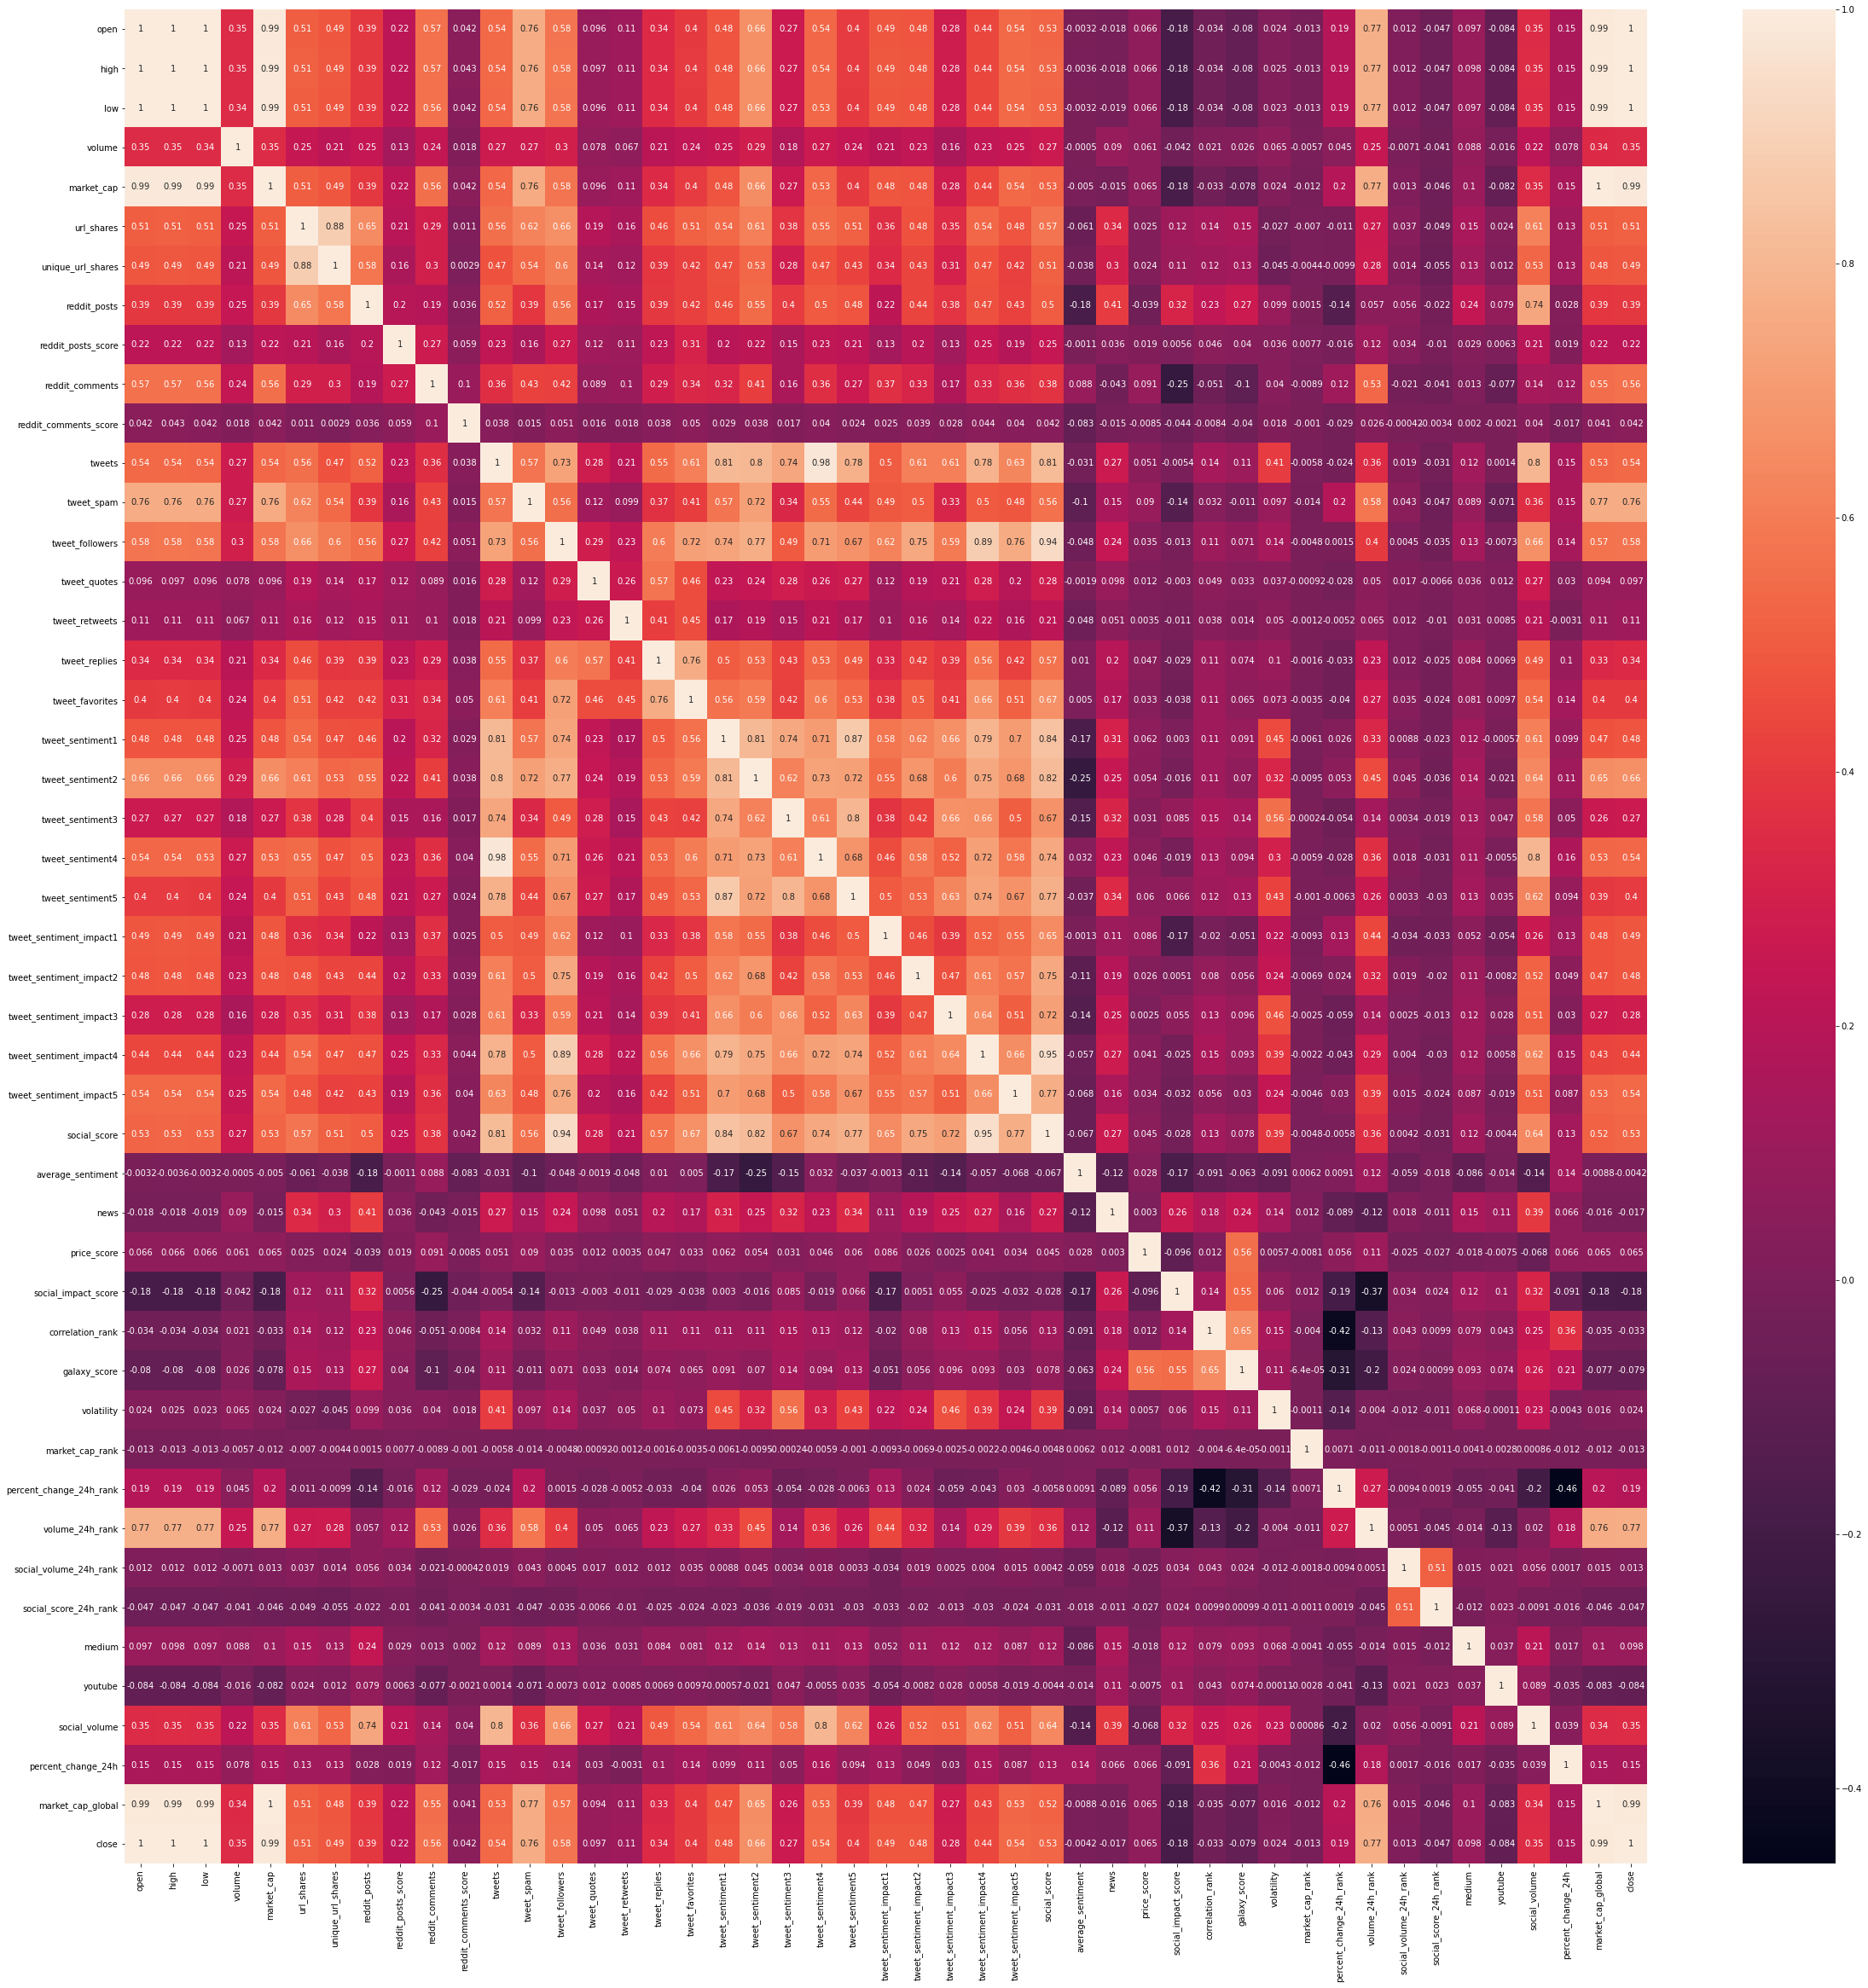

In [32]:
#Plotting a heat map
plt.figure(figsize=(40, 40))

sns.heatmap(crypto_corr, annot = True)

From the correlation matrix and heat map, it is observed that high correlation exists between open, high, low, market_cap, market cap global, url shares and unique url shares. Open, high, low, market cap and market cap global are all correlated to each other while url shares and unique url shares are also correlated to each other.

### Detecting Outliers
Checking for and handling outliers because outliers can affect the training data and may lead to inaccurate results.

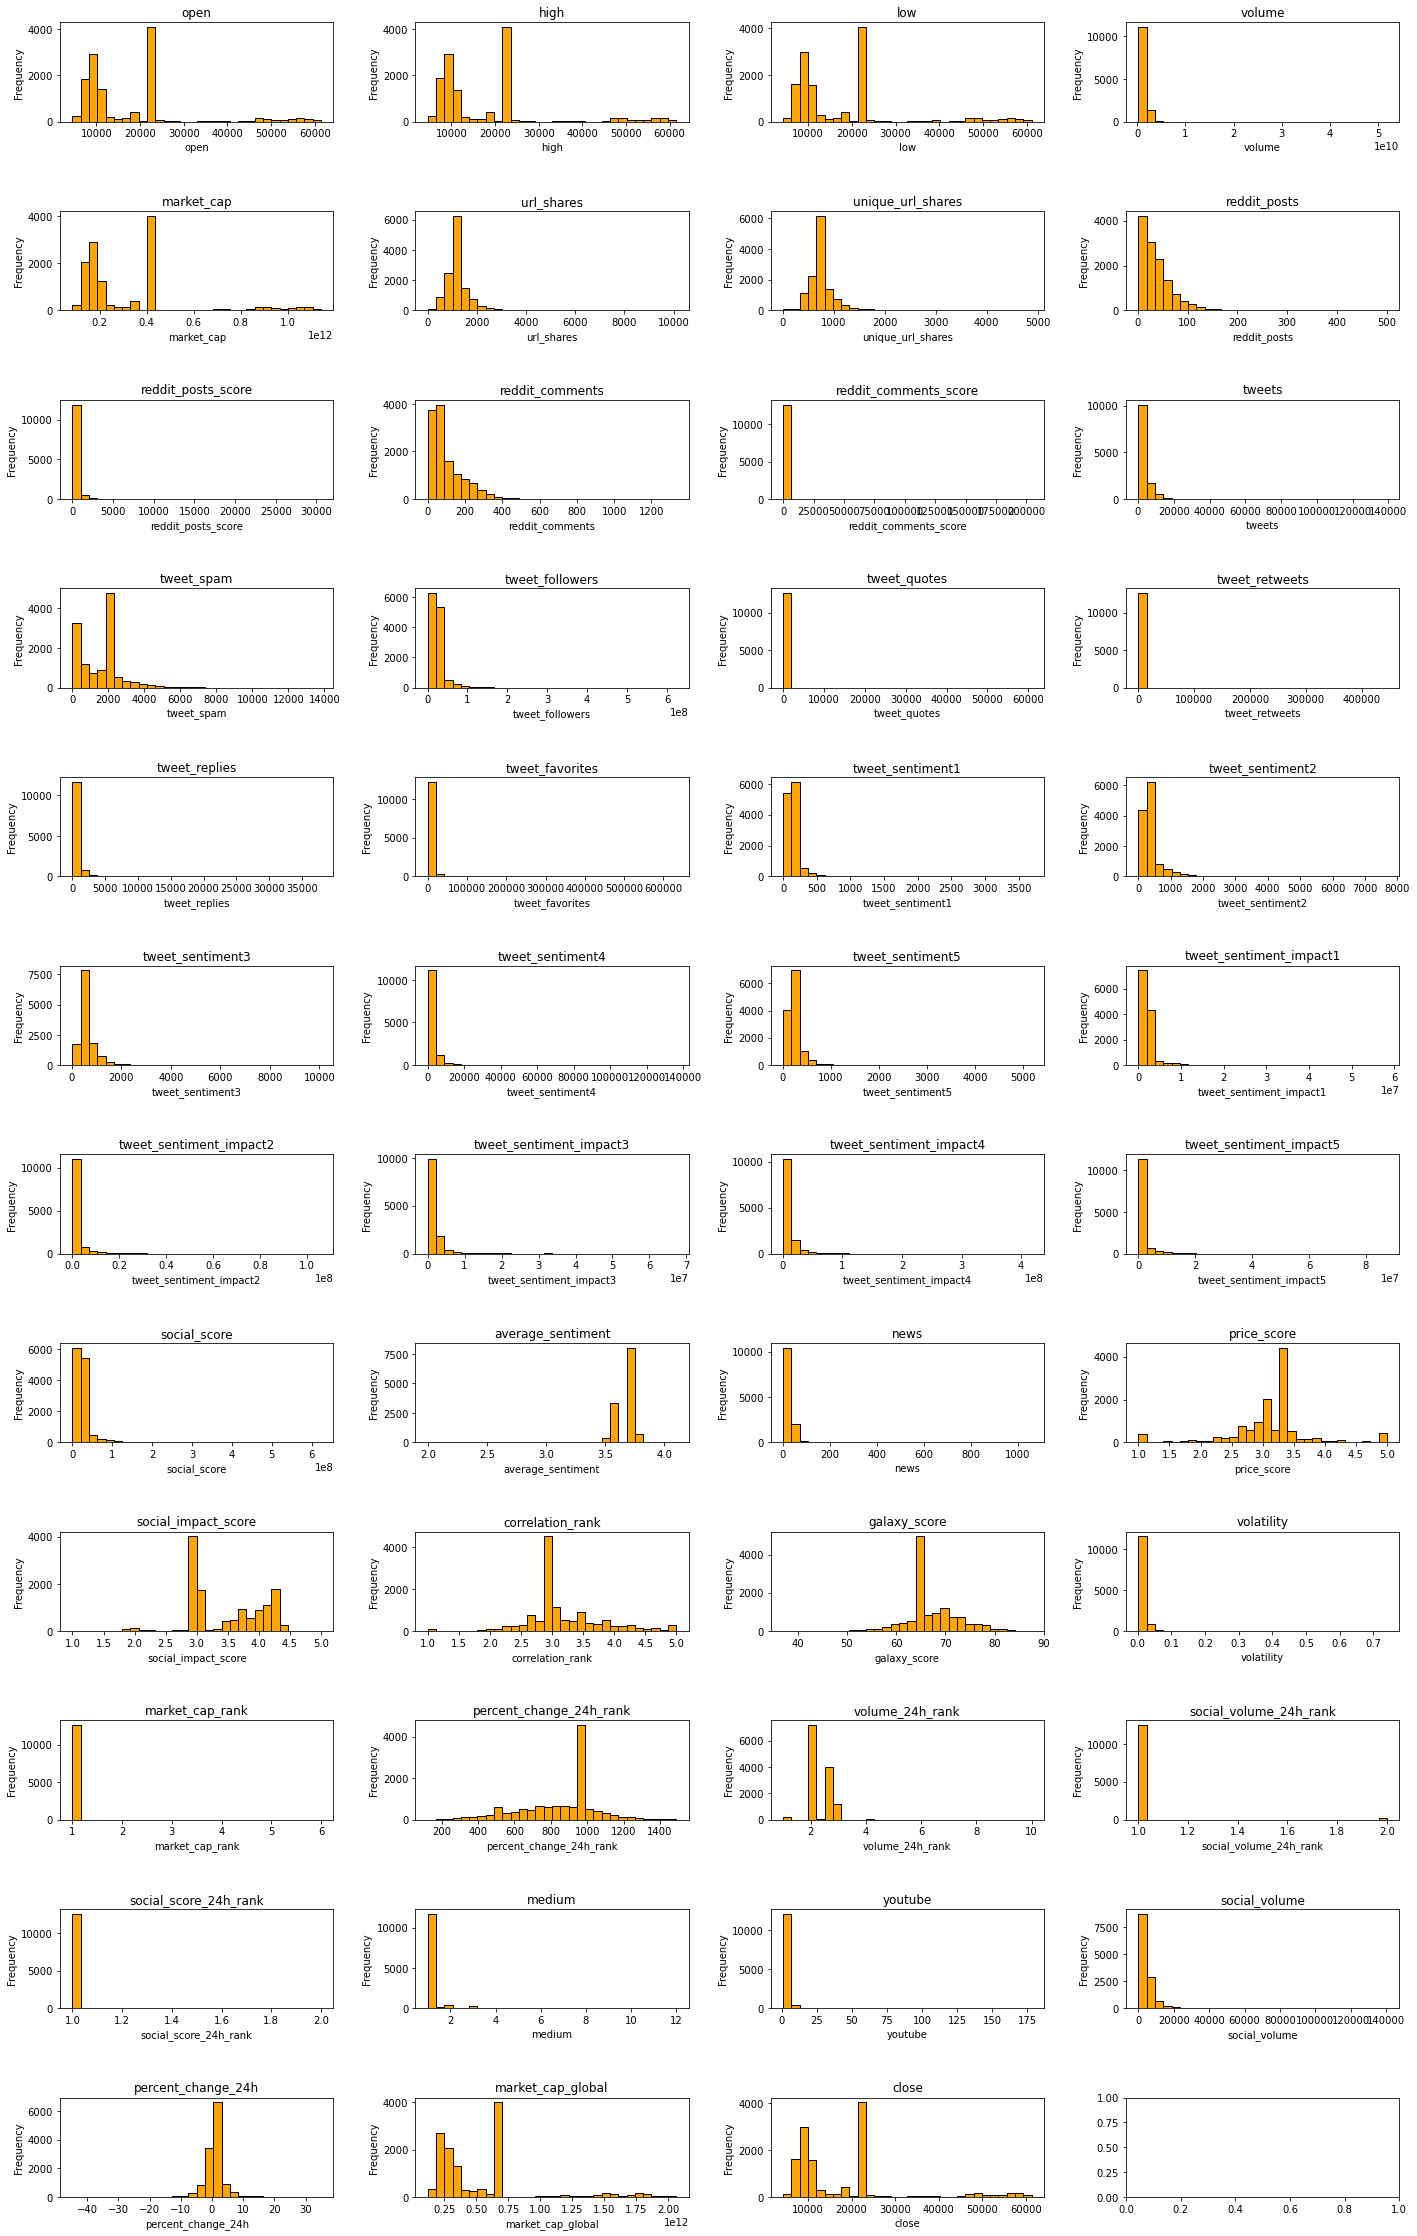

In [33]:
# Create a list of all the variables in the train data set
variables = train.columns

# Create a figure with subplots for each variable
fig, axes = plt.subplots(nrows=12, ncols=4, figsize=(24, 40))

# Plot a histogram for each variable
for i, variable in enumerate(variables):
    if i < len(variables):
        axes[i // 4, i % 4].hist(train[variable], bins=30, facecolor='orange', edgecolor='black')
        axes[i // 4, i % 4].set_title(variable)
        axes[i // 4, i % 4].set_ylabel('Frequency')
        axes[i // 4, i % 4].set_xlabel(variable)

# Increase the spacing between subplots
plt.subplots_adjust(hspace=0.9, wspace=0.3)

# Show the figure
plt.show()


Histograms plotted revealed that volume, medium, tweet followers, social_volume_24h_rank, social_score_24h_rank,and market cap have normal distributions while open, high, low, market_cap, reddit_posts, reddit_posts_score, reddit_comments_score, tweets, tweet_spam, tweet_quotes, tweet_retweets, tweet_replies, tweet_favorites, tweet_sentiment2, tweet_sentiment3, tweet_sentiment4, tweet_sentiment5, tweet_sentiment_impact2, tweet_sentiment_impact3, tweet_sentiment_impact4, tweet_sentiment_impact5, social_score, news, social_impact_score, galaxy_score, volatility, volume_24h_rank,  social_volume, market_cap_global, close are all skewed distributions to the right.
On the other hand, url_shares, unique_url_shares, reddit_comments, tweet_sentiment_1, tweet_sentiment_impact, correlation_rank, percent_change_24h rank, youtube, and average sentiments percent_change_24h have distributions that are skewed to the left.

These box plots show that there are extremely high and low values in all the variables. Hence, it is evident that numerous outliers exist within this data set.

open                         AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
high                       AxesSubplot(0.223936,0.799681;0.0824468x0.0803...
low                        AxesSubplot(0.322872,0.799681;0.0824468x0.0803...
volume                     AxesSubplot(0.421809,0.799681;0.0824468x0.0803...
market_cap                 AxesSubplot(0.520745,0.799681;0.0824468x0.0803...
url_shares                 AxesSubplot(0.619681,0.799681;0.0824468x0.0803...
unique_url_shares          AxesSubplot(0.718617,0.799681;0.0824468x0.0803...
reddit_posts               AxesSubplot(0.817553,0.799681;0.0824468x0.0803...
reddit_posts_score           AxesSubplot(0.125,0.703298;0.0824468x0.0803191)
reddit_comments            AxesSubplot(0.223936,0.703298;0.0824468x0.0803...
reddit_comments_score      AxesSubplot(0.322872,0.703298;0.0824468x0.0803...
tweets                     AxesSubplot(0.421809,0.703298;0.0824468x0.0803...
tweet_spam                 AxesSubplot(0.520745,0.703298;0.0824468x0.0803...

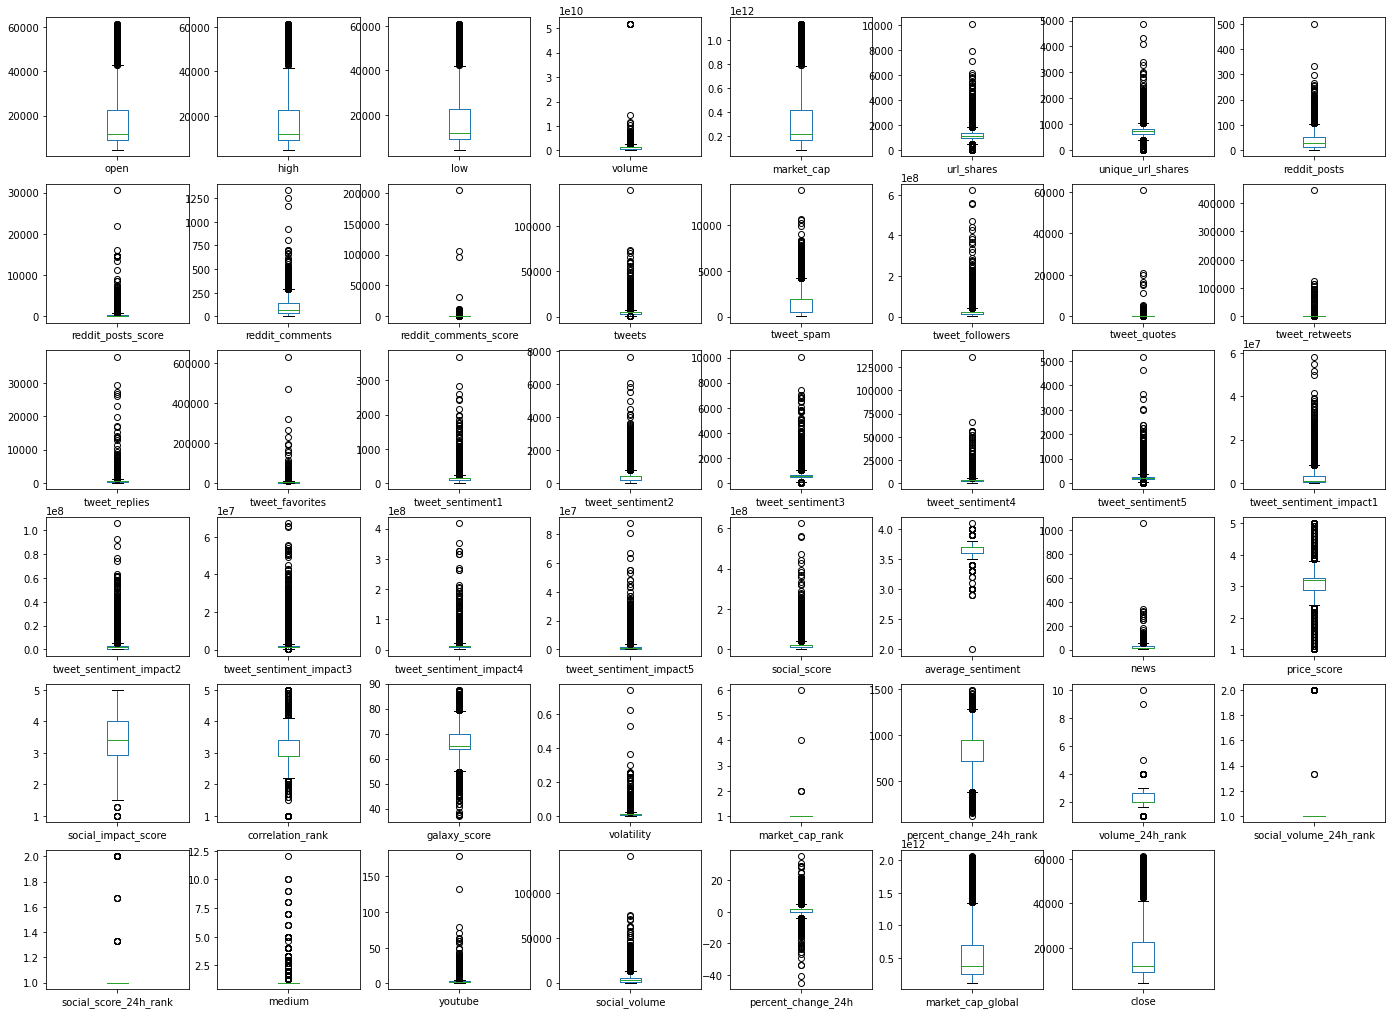

In [34]:
#Plotting box plots to visualize outliers before dealing with them
train.plot(kind='box', 
                   subplots=True, 
                   layout=(8, 8), 
                   sharex=False, 
                   figsize=(24, 24))

open                         AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
high                       AxesSubplot(0.223936,0.799681;0.0824468x0.0803...
low                        AxesSubplot(0.322872,0.799681;0.0824468x0.0803...
volume                     AxesSubplot(0.421809,0.799681;0.0824468x0.0803...
market_cap                 AxesSubplot(0.520745,0.799681;0.0824468x0.0803...
url_shares                 AxesSubplot(0.619681,0.799681;0.0824468x0.0803...
unique_url_shares          AxesSubplot(0.718617,0.799681;0.0824468x0.0803...
reddit_posts               AxesSubplot(0.817553,0.799681;0.0824468x0.0803...
reddit_posts_score           AxesSubplot(0.125,0.703298;0.0824468x0.0803191)
reddit_comments            AxesSubplot(0.223936,0.703298;0.0824468x0.0803...
reddit_comments_score      AxesSubplot(0.322872,0.703298;0.0824468x0.0803...
tweets                     AxesSubplot(0.421809,0.703298;0.0824468x0.0803...
tweet_spam                 AxesSubplot(0.520745,0.703298;0.0824468x0.0803...

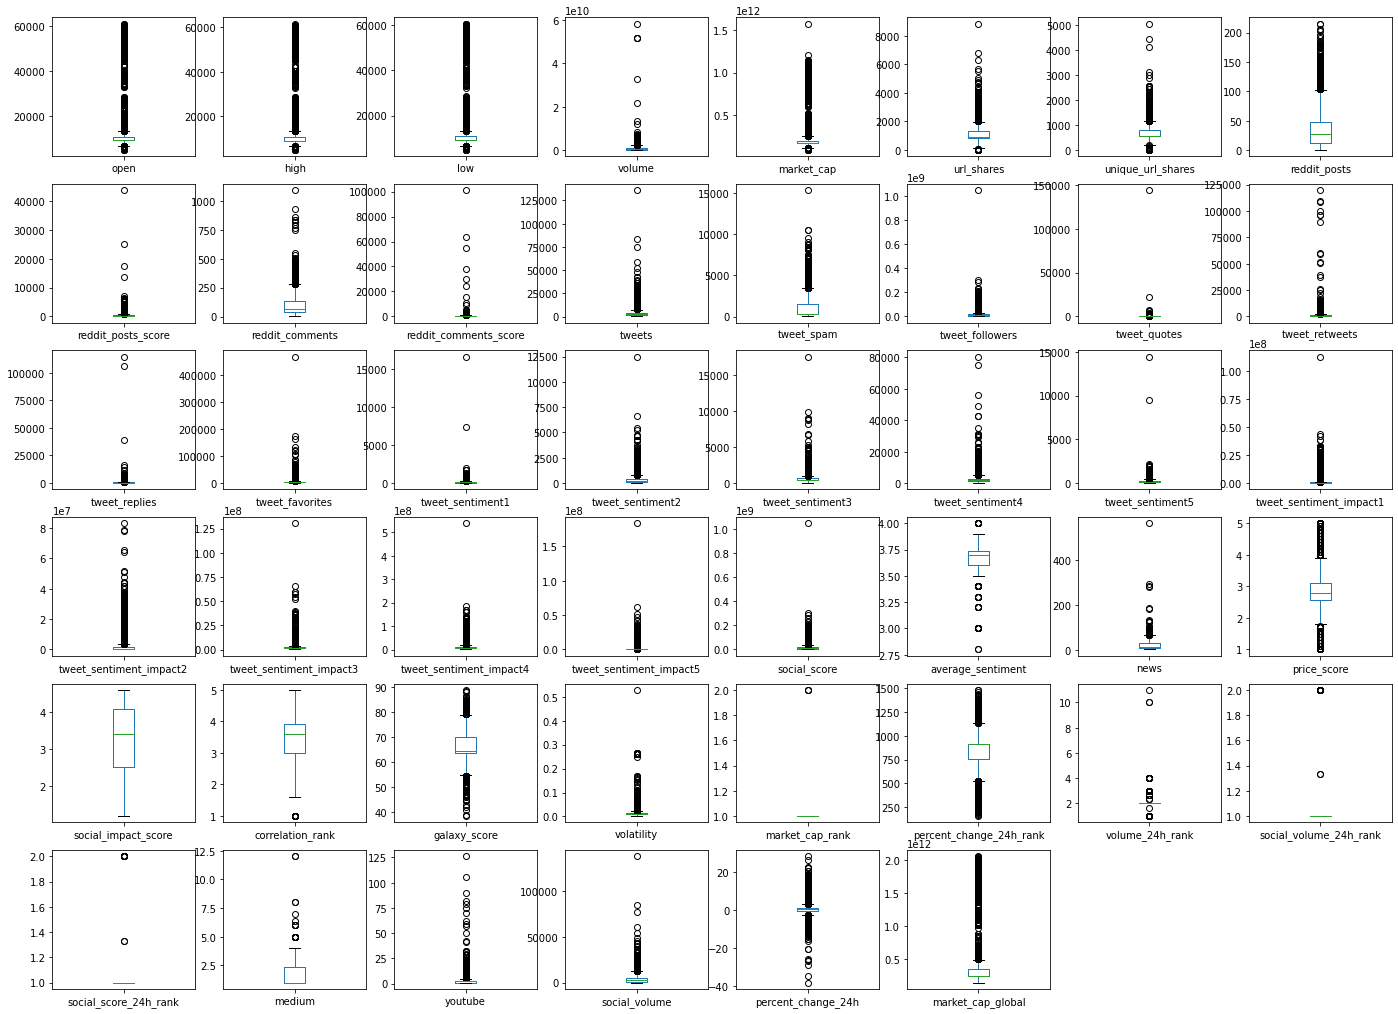

In [35]:
#Plotting box plots in test set to visualize outliers before dealing with them
test.plot(kind='box', 
                   subplots=True, 
                   layout=(8, 8), 
                   sharex=False, 
                   figsize=(24, 24))

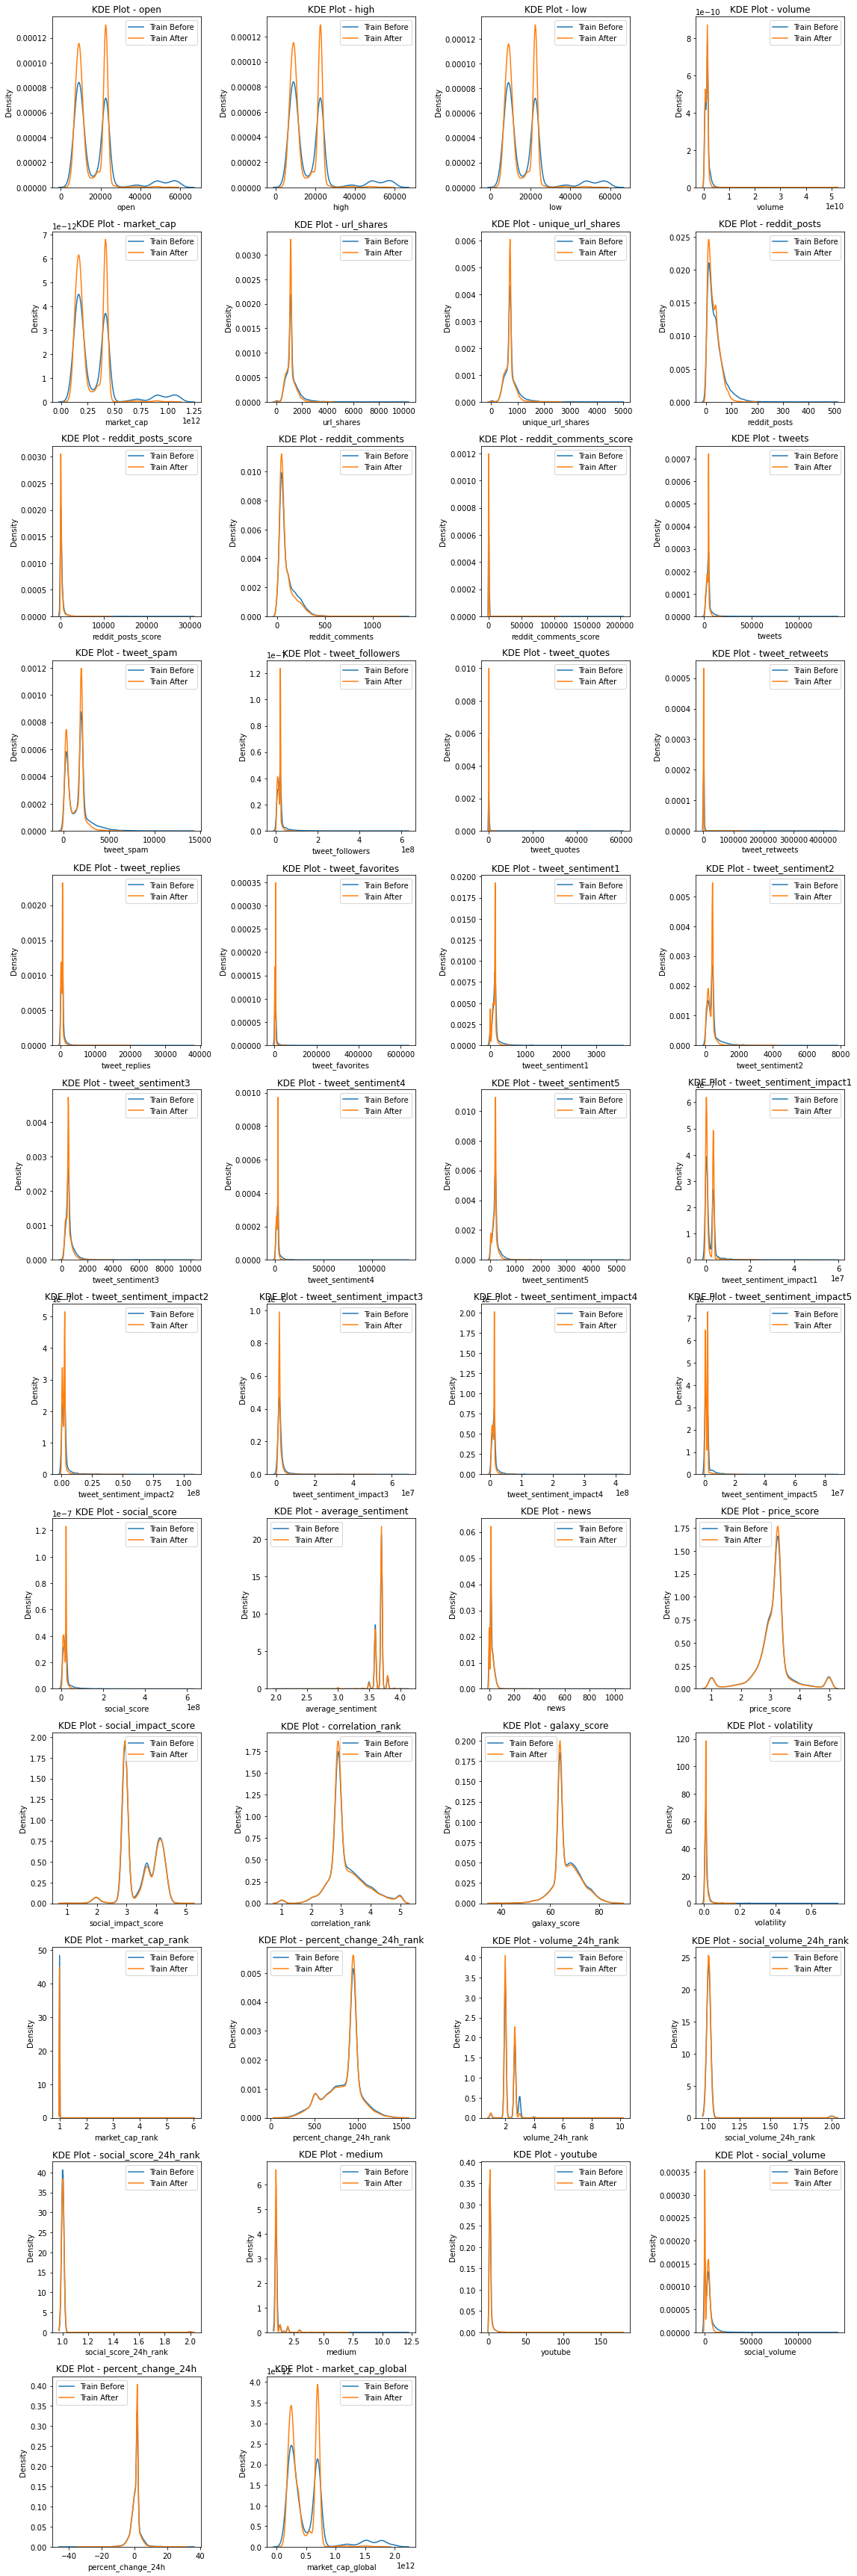

In [36]:

# Load your train and test data
# train = ...
# test = ...

# Apply Isolation Forest for outlier detection and replacement (train dataset)
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(train.drop('close', axis=1))
outliers_train = clf.predict(train.drop('close', axis=1)) == -1
train_no_outliers = train.drop('close', axis=1).copy()  # Make a copy of the original train data
train_no_outliers[outliers_train] = np.nan  # Replace outliers with NaN

# Apply Isolation Forest for outlier detection and replacement (test dataset)
outliers_test = clf.predict(test) == -1
test_no_outliers = test.copy()  # Make a copy of the original test data
test_no_outliers[outliers_test] = np.nan  # Replace outliers with NaN

# Ensure both datasets have the same columns
test_no_outliers = test_no_outliers[train_no_outliers.columns]

# Impute missing values in train and test datasets
imputer = KNNImputer(n_neighbors=3, weights='uniform')
train_features = pd.DataFrame(imputer.fit_transform(train_no_outliers), columns=train_no_outliers.columns)
test_features = pd.DataFrame(imputer.transform(test_no_outliers), columns=test_no_outliers.columns)

# Plot KDE plots for all variables before and after outlier treatment and imputation
num_features = len(train_features.columns)
num_rows = (num_features - 1) // 4 + 1
plt.figure(figsize=(16, 4 * num_rows))

for i, feature in enumerate(train_features.columns):
    plt.subplot(num_rows, 4, i + 1)
    sns.kdeplot(train[feature], label='Train Before')
    sns.kdeplot(train_no_outliers[feature], label='Train After')
    plt.title(f'KDE Plot - {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


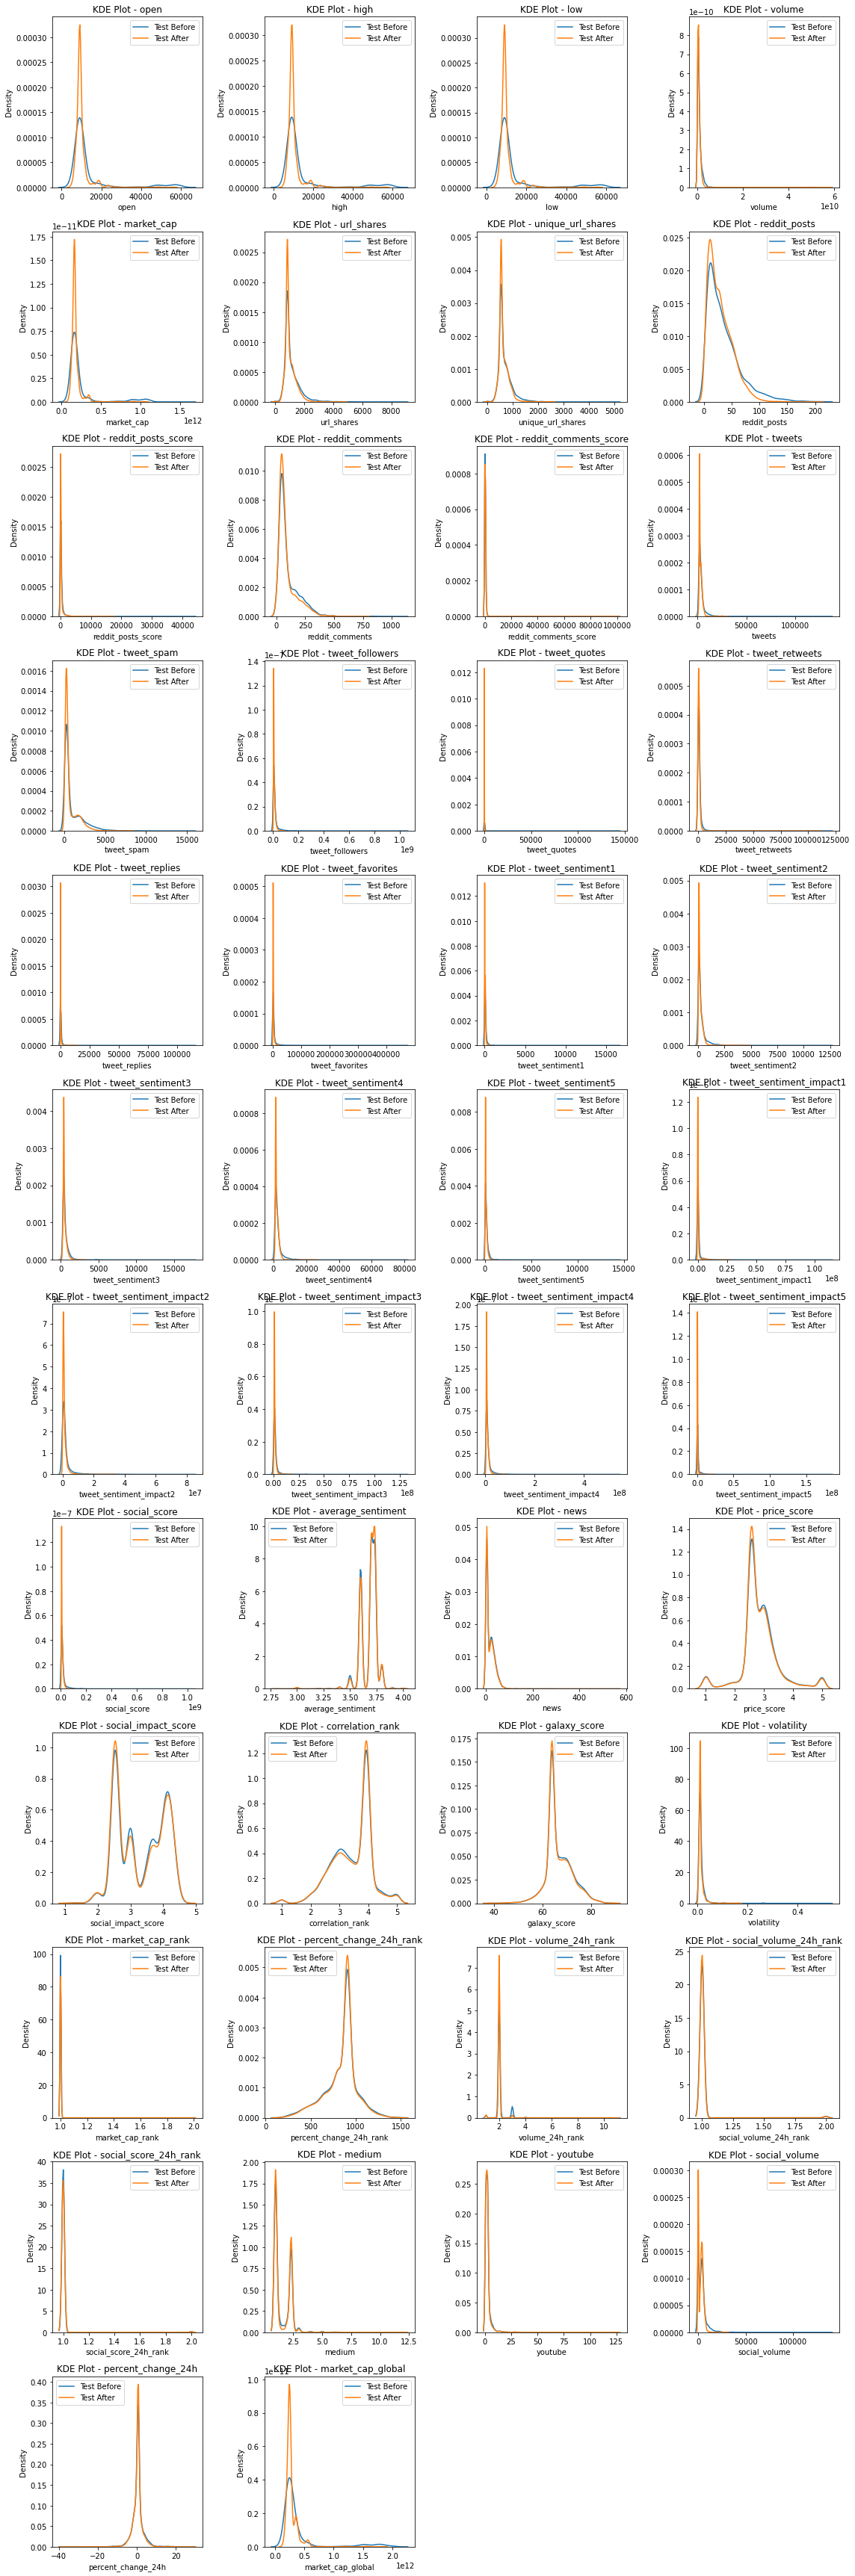

In [37]:
# Plot KDE plots for all variables before and after outlier treatment and imputation
num_features = len(test_features.columns)
num_rows = (num_features - 1) // 4 + 1
plt.figure(figsize=(16, 4 * num_rows))

for i, feature in enumerate(test_features.columns):
    plt.subplot(num_rows, 4, i + 1)
    sns.kdeplot(test[feature], label='Test Before')
    sns.kdeplot(test_no_outliers[feature], label='Test After')
    plt.title(f'KDE Plot - {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


### FEATURE SELECTION

#### FEATURE ENGINEERING

In [38]:
from sklearn.preprocessing import StandardScaler

# Separate target variable
train_target = train['close']

# Remove target variable for feature engineering
train_features = train.drop('close', axis=1)
test_features = test

# Feature engineering: Creating new features for train set
train_features['feature_sum'] = train_features.sum(axis=1)
train_features['feature_mean'] = train_features.mean(axis=1)
train_features['feature_std'] = train_features.std(axis=1)

# Feature engineering: Creating new features for test set
test_features['feature_sum'] = test_features.sum(axis=1)
test_features['feature_mean'] = test_features.mean(axis=1)
test_features['feature_std'] = test_features.std(axis=1)

# Scaling features
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train_features), columns=train_features.columns)
test_scaled = pd.DataFrame(scaler.transform(test_features), columns=test_features.columns)


In [39]:
#checking the shape
train_scaled.shape

(12632, 49)

In [40]:
test_scaled.shape

(6222, 49)

In [41]:
#Creating a Dataframe of the scaled data and viewing it
scaled_test_df = pd.DataFrame(test_scaled, columns= test.columns)

scaled_test_df.head(5)

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,feature_sum,feature_mean,feature_std
0,-0.710933,-0.710676,-0.710980,-0.665558,-0.709596,-0.748085,-0.773318,-0.943053,-0.362647,-1.123066,...,-0.110769,-0.066121,2.505585,0.034407,-0.810909,-0.035057,-0.743701,-0.732311,-0.732311,-0.733110
1,-0.531562,-0.531979,-0.528946,-0.217802,-0.513460,0.922625,1.187405,0.877020,-0.161994,-0.571821,...,-0.110769,-0.066121,-0.256966,-0.430337,0.689134,-0.434575,-0.445607,-0.470702,-0.470702,-0.468027
2,-0.943029,-0.942004,-0.945185,0.101035,-0.925691,-1.634914,-1.933423,-0.815329,-0.342198,-0.808069,...,-0.110769,-0.066121,-0.256966,-0.058542,-0.252643,0.284784,-0.914615,-0.917968,-0.917968,-0.917861
3,-0.710933,-0.710676,-0.710980,-0.665558,-0.709596,-0.748085,-0.773318,-0.911122,-0.311525,1.295661,...,-0.110769,-0.066121,2.505585,0.034407,-0.766131,-0.035057,-0.743701,-0.732311,-0.732311,-0.733110
4,-0.710933,-0.710676,-0.710980,-0.665558,-0.709596,-0.748085,-0.773318,-0.336362,-0.371593,-0.774319,...,-0.110769,-0.066121,2.505585,0.034407,-0.800544,-0.035057,-0.743701,-0.732311,-0.732311,-0.733110


#### MODEL TRAINING AND EVALUATION

In [42]:
from sklearn.model_selection import train_test_split

# Splitting the scaled data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

##### Training a model without feature selection

In [43]:
#Importing the estimator object (model)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#importing libraries for evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [44]:
#Creating an instance of the estimator
linear_regression = LinearRegression()

#Using the training data to train the estimator
linear_regression.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_lr = linear_regression.predict(X_val)

# Calculate RMSE
rmse = mean_squared_error(y_val, y_pred_lr, squared=False)
print(f'Validation RMSE: {rmse}')
print("R2_score : ", r2_score(y_val, y_pred_lr))

Validation RMSE: 75.04551976882892
R2_score :  0.9999609014404099


In [45]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = model.predict(X_val)

# Calculate RMSE
rmse = mean_squared_error(y_val, y_pred_rf, squared=False)
print(f'Validation RMSE: {rmse}')
print("R2_score : ", r2_score(y_val, y_pred_rf))

Validation RMSE: 80.75879805363466
R2_score :  0.9999547216167065


##### Performing feature selection before model training

In [46]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Splitting the scaled data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

# Applying SelectKBest feature selection
num_features_to_select = 5  # Choose the number of features to select
selector = SelectKBest(score_func=f_regression, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)


##### Training a model after feature selection

In [47]:
#Creating an instance of the estimator
lr = LinearRegression()

#Using the training data to train the estimator
lr.fit(X_train_selected, y_train)

y_pred_sel = lr.predict(X_val_selected)


# Calculating RMSE
rmse = mean_squared_error(y_val, y_pred_sel, squared=False)
print(f'Validation RMSE: {rmse}')
print("R2_score : ", r2_score(y_val, y_pred_sel))

Validation RMSE: 79.69830510251938
R2_score :  0.9999559029649824


In [48]:
# Initializing and training the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_selected, y_train)

# Making predictions on the validation set
y_pred_sele = model_rf.predict(X_val_selected)

# Calculating RMSE
rmse = mean_squared_error(y_val, y_pred_sele, squared=False)
print(f'Validation RMSE: {rmse}')
print("R2_score : ", r2_score(y_val, y_pred_sele))


Validation RMSE: 54.32689484827879
R2_score :  0.9999795100459722


This test set is kept until after gettting the best model from training.

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
cv = 5  # Number of folds for cross-validation

In [51]:
# Linear Regression with cross-validation:
lr_scores = cross_val_score(linear_regression, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
print("Linear Regression CV RMSE:", -lr_scores.mean())

# Random Forest with cross-validation:
rf_scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
print("Random Forest CV RMSE:", -rf_scores.mean())

# Linear Regression with feature selection and cross-validation:
lr_selected_scores = cross_val_score(lr, X_train_selected, y_train, scoring='neg_root_mean_squared_error', cv=cv)
print("Linear Regression (Selected Features) CV RMSE:", -lr_selected_scores.mean())

# Random Forest with feature selection and cross-validation:
rf_selected_scores = cross_val_score(model_rf, X_train_selected, y_train, scoring='neg_root_mean_squared_error', cv=cv)
print("Random Forest (Selected Features) CV RMSE:", -rf_selected_scores.mean())


Linear Regression CV RMSE: 53.9211430458095
Random Forest CV RMSE: 61.68479600900423
Linear Regression (Selected Features) CV RMSE: 58.81014632688274
Random Forest (Selected Features) CV RMSE: 58.30084857034892


Since the models have similar r2 score, r2 score is not a reliable metric to evaluate the model performance. Thus, to select the best model, I considered the RMSE of all models. The best model is therefore the model with the lowest RMSE. In this case, it is the Linear Regression model with cross-validation and without feature selection. This model will then be used in predicting the test data which has been kept aside before training. Although, the target feature of the test data is hidden. The RMSE will be compared to the leaderboard to check it's significance.

In [52]:
# Select the best model based on cross-validation scores
best_model = linear_regression  # Assuming linear regression had better scores

# Retrain the best model on the full training set
best_model.fit(train_scaled, train_target)

# Make predictions on the test set (features only)
test_predictions = best_model.predict(test_scaled)

# Creating the new columns for the submission file
test['id'] = test_id
test['close'] = test_predictions


#Creating a submission DataFrame because I want to submit my predictions
submission = pd.DataFrame({'id': test_id, 'close': test_predictions})


submission = test[['id', 'close']]
submission.to_csv('submission.csv', index=False)

In [53]:
submission

,id,close
0,ID_323Sn2,9124.067968
1,ID_325SNW,11358.854609
2,ID_325uzE,6301.465054
3,ID_328qCx,9123.417109
4,ID_3293uJ,9128.991800
...,...,...
6217,ID_zufSPk,8256.748282
6218,ID_zuz9yf,10877.580041
6219,ID_zvrMSX,9123.497676
6220,ID_zy9Cfv,9122.931267
